In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier,ExtraTreesClassifier, VotingClassifier
from sklearn.metrics import classification_report
import scikitplot as skplt
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv('flights_total_ATL_Dep_Delay.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65267 entries, 0 to 65266
Columns: 199 entries, Unnamed: 0 to DEST_XNA
dtypes: float64(186), int64(12), object(1)
memory usage: 99.1+ MB


In [4]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df.head()

,Unnamed: 0,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY_NEW,CANCELLED,DISTANCE,Ort_Rüzgar,Ort_Sýcaklýk,TMAX,TMIN,2Dk_max_rüzgar,5Dk_max_rüzgar,DEP_TIME_hour,DEP_TIME_min,OP_CARRIER_9E,OP_CARRIER_AA,OP_CARRIER_AS,OP_CARRIER_B6,OP_CARRIER_DL,OP_CARRIER_EV,OP_CARRIER_F9,OP_CARRIER_MQ,OP_CARRIER_NK,OP_CARRIER_OH,OP_CARRIER_OO,OP_CARRIER_UA,OP_CARRIER_WN,OP_CARRIER_YV,OP_CARRIER_YX,DEST_ABE,DEST_ABQ,DEST_ABY,DEST_ACY,DEST_AEX,DEST_AGS,DEST_ALB,DEST_ANC,DEST_ASE,DEST_ATW,DEST_AUS,DEST_AVL,DEST_AVP,DEST_BDL,DEST_BHM,DEST_BMI,DEST_BNA,DEST_BOS,DEST_BQK,DEST_BTR,DEST_BTV,DEST_BUF,DEST_BUR,DEST_BWI,DEST_BZN,DEST_CAE,DEST_CAK,DEST_CHA,DEST_CHO,DEST_CHS,DEST_CID,DEST_CLE,DEST_CLT,DEST_CMH,DEST_COS,DEST_CRW,DEST_CSG,DEST_CVG,DEST_DAB,DEST_DAL,DEST_DAY,DEST_DCA,DEST_DEN,DEST_DFW,DEST_DHN,DEST_DSM,DEST_DTW,DEST_ECP,DEST_EGE,DEST_ELM,DEST_ELP,DEST_EVV,DEST_EWN,DEST_EWR,DEST_EYW,DEST_FAR,DEST_FAY,DEST_FCA,DEST_FLL,DEST_FNT,DEST_FSD,DEST_FSM,DEST_FWA,DEST_GNV,DEST_GPT,DEST_GRB,DEST_GRR,DEST_GSO,DEST_GSP,DEST_GTR,DEST_HDN,DEST_HHH,DEST_HNL,DEST_HOU,DEST_HPN,DEST_HSV,DEST_IAD,DEST_IAH,DEST_ICT,DEST_ILM,DEST_IND,DEST_ISP,DEST_JAC,DEST_JAN,DEST_JAX,DEST_JFK,DEST_LAS,DEST_LAX,DEST_LEX,DEST_LFT,DEST_LGA,DEST_LIT,DEST_LNK,DEST_MCI,DEST_MCO,DEST_MDT,DEST_MDW,DEST_MEM,DEST_MGM,DEST_MHT,DEST_MIA,DEST_MKE,DEST_MLB,DEST_MLI,DEST_MLU,DEST_MOB,DEST_MSN,DEST_MSO,DEST_MSP,DEST_MSY,DEST_MTJ,DEST_MYR,DEST_OAJ,DEST_OAK,DEST_OKC,DEST_OMA,DEST_ONT,DEST_ORD,DEST_ORF,DEST_PBI,DEST_PDX,DEST_PHF,DEST_PHL,DEST_PHX,DEST_PIA,DEST_PIT,DEST_PNS,DEST_PSP,DEST_PVD,DEST_PWM,DEST_RAP,DEST_RDU,DEST_RIC,DEST_RNO,DEST_ROA,DEST_ROC,DEST_RST,DEST_RSW,DEST_SAN,DEST_SAT,DEST_SAV,DEST_SBN,DEST_SDF,DEST_SEA,DEST_SFO,DEST_SGF,DEST_SHV,DEST_SJC,DEST_SJU,DEST_SLC,DEST_SMF,DEST_SNA,DEST_SRQ,DEST_STL,DEST_STT,DEST_STX,DEST_SYR,DEST_TLH,DEST_TPA,DEST_TRI,DEST_TTN,DEST_TUL,DEST_TUS,DEST_TVC,DEST_TYS,DEST_VLD,DEST_VPS,DEST_XNA
0,24,2019,1,5,6,Delay 30-60 min,0,581,13.42,49,59,44,23.9,33.1,15,36,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,32,2019,1,5,6,Delay 15-30 min,0,534,13.42,49,59,44,23.9,33.1,6,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,40,2019,1,5,6,Delay 30-60 min,0,746,13.42,49,59,44,23.9,33.1,13,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [5]:
df = df.drop(['Unnamed: 0'], axis=1)

Delay class:
 Delay 15-30 min    26123
Delay 30-60 min    20254
Delay 60+          18890
Name: DEP_DELAY_NEW, dtype: int64


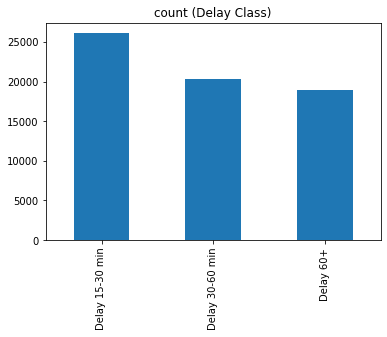

In [6]:
print("Delay class:\n",df['DEP_DELAY_NEW'].value_counts())# plot the count after under-sampeling
df['DEP_DELAY_NEW'].value_counts().plot(kind='bar', title='count (Delay Class)');

In [7]:
df.shape

(65267, 198)

In [8]:
def feature_importance(m, df):
    return pd.DataFrame({'columns':df.columns, 'importance':m.feature_importances_}
                       ).sort_values('importance', ascending=False)

In [9]:
x = df.drop(columns = ['DEP_DELAY_NEW'])
y = df['DEP_DELAY_NEW']

# AdaBoost

## AdaBoost Base Model

In [10]:
x_ada_imbalanced_train, x_ada_imbalanced_test, y_ada_imbalanced_train, y_ada_imbalanced_test = train_test_split(x, y, test_size=0.30,shuffle=False)

In [11]:
ada_imbalanced= AdaBoostClassifier().fit(x_ada_imbalanced_train, y_ada_imbalanced_train)
ada_imbalanced_pred = ada_imbalanced.predict(x_ada_imbalanced_test)
ada_imbalanced.score(x_ada_imbalanced_test, y_ada_imbalanced_test)

0.4507941371737909

In [12]:
print(classification_report(y_ada_imbalanced_test, ada_imbalanced_pred))

                 precision    recall  f1-score   support

Delay 15-30 min       0.52      0.69      0.59      8775
Delay 30-60 min       0.32      0.06      0.11      6150
      Delay 60+       0.35      0.50      0.42      4656

       accuracy                           0.45     19581
      macro avg       0.40      0.42      0.37     19581
   weighted avg       0.42      0.45      0.40     19581



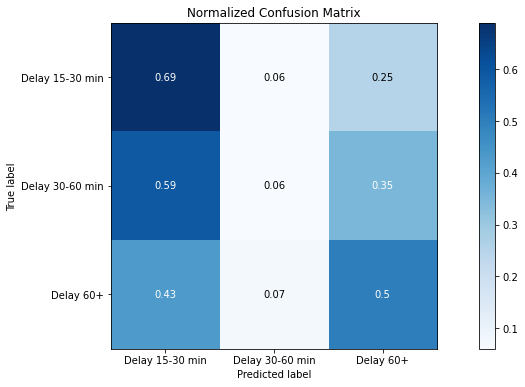

In [13]:
skplt.metrics.plot_confusion_matrix(y_ada_imbalanced_test, ada_imbalanced_pred, figsize=(15,6),  normalize=True)
plt.show()

## AdaBoost Model with SMOTE

In [14]:
x_ada_balanced_with_smote_train, x_ada_balanced_with_smote_test, y_ada_balanced_with_smote_train, y_ada_balanced_with_smote_test = train_test_split(x, y, test_size=0.30,shuffle=False)

In [15]:
smote_reshape = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=2)
x_ada_balanced_with_smote_train_reshape, y_ada_balanced_with_smote_train_reshape = smote_reshape.fit_resample                                                                                       (x_ada_balanced_with_smote_train, y_ada_balanced_with_smote_train)

In [16]:
ada_balanced_with_smote= AdaBoostClassifier().fit(x_ada_balanced_with_smote_train_reshape, y_ada_balanced_with_smote_train_reshape)
ada_balanced_with_smote_pred = ada_balanced_with_smote.predict(x_ada_balanced_with_smote_test)
ada_balanced_with_smote.score(x_ada_balanced_with_smote_test, y_ada_balanced_with_smote_test)

0.449977018538379

In [17]:
print(classification_report(y_ada_balanced_with_smote_test, ada_balanced_with_smote_pred))

                 precision    recall  f1-score   support

Delay 15-30 min       0.51      0.68      0.58      8775
Delay 30-60 min       0.32      0.13      0.19      6150
      Delay 60+       0.38      0.44      0.41      4656

       accuracy                           0.45     19581
      macro avg       0.40      0.42      0.39     19581
   weighted avg       0.42      0.45      0.42     19581



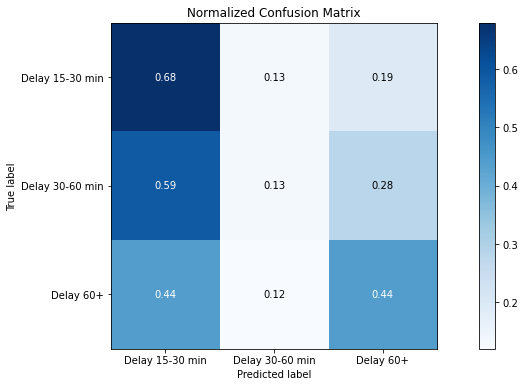

In [18]:
skplt.metrics.plot_confusion_matrix(y_ada_balanced_with_smote_test, ada_balanced_with_smote_pred, figsize=(15,6), normalize=True)
plt.show()

## AdaBoost Feature Importance

In [19]:
len(ada_balanced_with_smote.feature_importances_)

197

In [20]:
ada_balanced_with_smote.feature_importances_

array([0.  , 0.  , 0.04, 0.  , 0.  , 0.  , 0.04, 0.06, 0.08, 0.06, 0.06,
       0.06, 0.14, 0.  , 0.  , 0.  , 0.  , 0.  , 0.3 , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.02, 0.  , 0.04, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.02, 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.02, 0.  , 0.  , 0.  , 0.

In [21]:
pd.set_option('display.max_rows', None)
feature_importance_columns_ada_balanced_with_smote = feature_importance(ada_balanced_with_smote, x);
feature_importance_columns_ada_balanced_with_smote

,columns,importance
18,OP_CARRIER_DL,0.30
12,DEP_TIME_hour,0.14
8,TMAX,0.08
7,Ort_Sýcaklýk,0.06
9,TMIN,0.06
10,2Dk_max_rüzgar,0.06
11,5Dk_max_rüzgar,0.06
2,DAY_OF_MONTH,0.04
26,OP_CARRIER_WN,0.04
6,Ort_Rüzgar,0.04


In [22]:
feature_importance_drop_ada_balanced_with_smote = feature_importance_columns_ada_balanced_with_smote[feature_importance_columns_ada_balanced_with_smote.importance > 0.005]

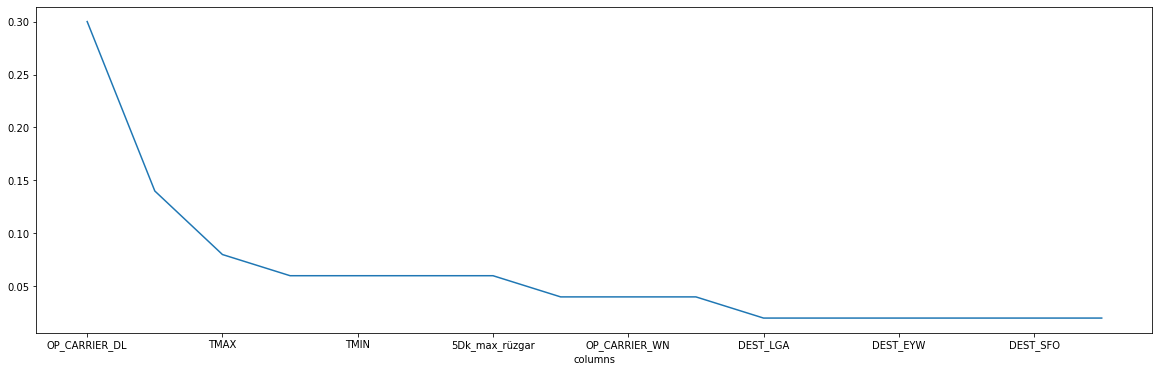

In [23]:
feature_importance_drop_ada_balanced_with_smote.plot('columns', 'importance', figsize=(20,6), legend=False);

In [24]:
keep_columns_ada_balanced_with_smote = feature_importance_columns_ada_balanced_with_smote[feature_importance_columns_ada_balanced_with_smote["importance"]>0.005]["columns"]; 
len(keep_columns_ada_balanced_with_smote)

16

In [25]:
keep_columns_ada_balanced_with_smote

18      OP_CARRIER_DL
12      DEP_TIME_hour
8                TMAX
7        Ort_Sýcaklýk
9                TMIN
10     2Dk_max_rüzgar
11     5Dk_max_rüzgar
2        DAY_OF_MONTH
26      OP_CARRIER_WN
6          Ort_Rüzgar
119          DEST_LGA
82           DEST_EWR
83           DEST_EYW
24      OP_CARRIER_OO
173          DEST_SFO
146          DEST_ORD
Name: columns, dtype: object

### AdaBoost Feature Importance Model

In [26]:
df_keep_ada_balanced_with_smote = df[keep_columns_ada_balanced_with_smote]
x_ada_feature_importance = df_keep_ada_balanced_with_smote
y_ada_feature_importance = df['DEP_DELAY_NEW']
x_ada_feature_importance_train, x_ada_feature_importance_test, y_ada_feature_importance_train, y_ada_feature_importance_test =     train_test_split(x_ada_feature_importance, y_ada_feature_importance, test_size=0.30, shuffle=False)

In [27]:
smote_reshape = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=2)
x_ada_feature_importance_train_reshape, y_ada_feature_importance_train_reshape = smote_reshape.fit_resample(x_ada_feature_importance_train, y_ada_feature_importance_train)

In [28]:
ada_balanced_with_smote_feature_importance= AdaBoostClassifier().fit(x_ada_feature_importance_train_reshape,                                                                                            y_ada_feature_importance_train_reshape)
ada_balanced_with_smote_feature_importance_pred = ada_balanced_with_smote_feature_importance.predict(x_ada_feature_importance_test)
ada_balanced_with_smote_feature_importance.score(x_ada_feature_importance_test, y_ada_feature_importance_test)

0.4478831520351361

In [29]:
print(classification_report(y_ada_feature_importance_test, ada_balanced_with_smote_feature_importance_pred))

                 precision    recall  f1-score   support

Delay 15-30 min       0.52      0.64      0.57      8775
Delay 30-60 min       0.33      0.19      0.24      6150
      Delay 60+       0.39      0.44      0.41      4656

       accuracy                           0.45     19581
      macro avg       0.41      0.42      0.41     19581
   weighted avg       0.43      0.45      0.43     19581



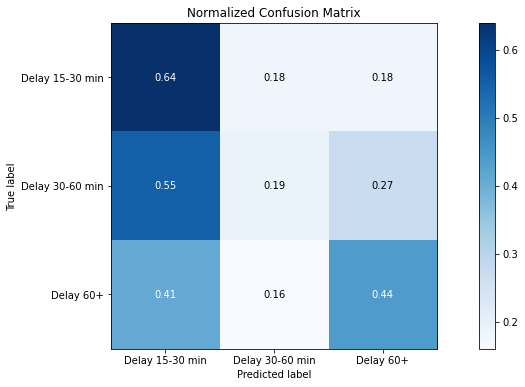

In [30]:
skplt.metrics.plot_confusion_matrix(y_ada_feature_importance_test, ada_balanced_with_smote_feature_importance_pred, figsize=(15,6), normalize=True)
plt.show()

# Gradient Boosting

## Gradient Boosting Base Model

In [31]:
x_gbc_imbalanced_train, x_gbc_imbalanced_test, y_gbc_imbalanced_train, y_gbc_imbalanced_test = train_test_split(x, y, test_size=0.30,shuffle=False)

In [32]:
gbc_imbalanced= GradientBoostingClassifier().fit(x_gbc_imbalanced_train,                                                                                                            y_gbc_imbalanced_train)
gbc_imbalanced_pred = gbc_imbalanced.predict(x_gbc_imbalanced_test)
gbc_imbalanced.score(x_gbc_imbalanced_test, y_gbc_imbalanced_test)

0.4593228129309024

In [33]:
print(classification_report(y_gbc_imbalanced_test, gbc_imbalanced_pred))

                 precision    recall  f1-score   support

Delay 15-30 min       0.54      0.60      0.57      8775
Delay 30-60 min       0.37      0.28      0.32      6150
      Delay 60+       0.39      0.44      0.41      4656

       accuracy                           0.46     19581
      macro avg       0.43      0.44      0.43     19581
   weighted avg       0.45      0.46      0.45     19581



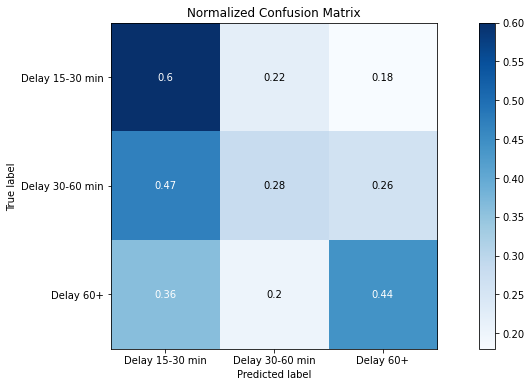

In [34]:
skplt.metrics.plot_confusion_matrix(y_gbc_imbalanced_test, gbc_imbalanced_pred, figsize=(15,6), normalize=True)
plt.show()

## Gradient Boosting Model with SMOTE

In [35]:
x_gbc_balanced_with_smote_train, x_gbc_balanced_with_smote_test, y_gbc_balanced_with_smote_train, y_gbc_balanced_with_smote_test = train_test_split(x, y, test_size=0.30,shuffle=False)

In [36]:
smote_reshape = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=2)
x_gbc_balanced_with_smote_train_reshape, y_gbc_balanced_with_smote_train_reshape = smote_reshape.fit_resample                                                                                       (x_gbc_balanced_with_smote_train, y_gbc_balanced_with_smote_train)

In [37]:
gbc_balanced_with_smote= GradientBoostingClassifier().fit(x_gbc_balanced_with_smote_train_reshape,                                                                                           y_gbc_balanced_with_smote_train_reshape)
gbc_balanced_with_smote_pred = gbc_balanced_with_smote.predict(x_gbc_balanced_with_smote_test)
gbc_balanced_with_smote.score(x_gbc_balanced_with_smote_test, y_gbc_balanced_with_smote_test)

0.47193708186507327

In [38]:
print(classification_report(y_gbc_balanced_with_smote_test, gbc_balanced_with_smote_pred))

                 precision    recall  f1-score   support

Delay 15-30 min       0.54      0.68      0.60      8775
Delay 30-60 min       0.40      0.17      0.24      6150
      Delay 60+       0.38      0.48      0.42      4656

       accuracy                           0.47     19581
      macro avg       0.44      0.44      0.42     19581
   weighted avg       0.46      0.47      0.44     19581



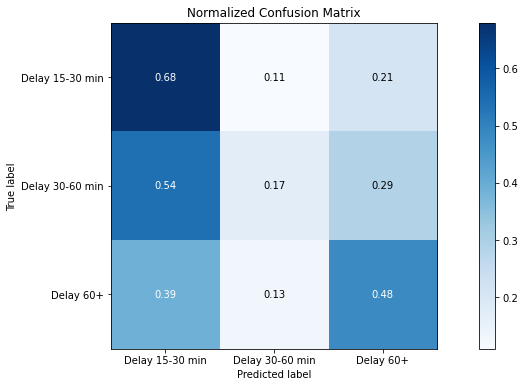

In [39]:
skplt.metrics.plot_confusion_matrix(y_gbc_balanced_with_smote_test, gbc_balanced_with_smote_pred, figsize=(15,6), normalize=True)
plt.show()

## Gradient Boosting Feature Importance

In [40]:
len(gbc_balanced_with_smote.feature_importances_)

197

In [41]:
gbc_balanced_with_smote.feature_importances_

array([0.00000000e+00, 3.98387393e-03, 4.28405184e-02, 1.38135951e-02,
       0.00000000e+00, 2.95311178e-02, 2.15467498e-02, 2.30200116e-02,
       4.02795189e-02, 2.75635898e-02, 2.81173707e-02, 6.73465107e-02,
       3.13754988e-01, 6.25379518e-02, 1.91179197e-03, 1.75620482e-03,
       1.86604769e-04, 4.72890735e-04, 1.59513694e-01, 0.00000000e+00,
       1.46435968e-03, 0.00000000e+00, 4.22522867e-04, 5.75387114e-04,
       1.53766380e-02, 1.36737308e-04, 5.91713667e-02, 5.88661553e-04,
       4.43685708e-04, 0.00000000e+00, 1.18732502e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.94088389e-04, 0.00000000e+00,
       6.92602978e-04, 0.00000000e+00, 0.00000000e+00, 9.25313121e-04,
       4.41928154e-04, 1.47836722e-04, 1.82782473e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.96709491e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [42]:
pd.set_option('display.max_rows', None)
feature_importance_columns_gbc_balanced_with_smote = feature_importance(gbc_balanced_with_smote, x);
feature_importance_columns_gbc_balanced_with_smote

,columns,importance
12,DEP_TIME_hour,0.313755
18,OP_CARRIER_DL,0.159514
11,5Dk_max_rüzgar,0.067347
13,DEP_TIME_min,0.062538
26,OP_CARRIER_WN,0.059171
2,DAY_OF_MONTH,0.042841
8,TMAX,0.040280
5,DISTANCE,0.029531
10,2Dk_max_rüzgar,0.028117
9,TMIN,0.027564


In [43]:
feature_importance_drop_gbc_balanced_with_smote = feature_importance_columns_gbc_balanced_with_smote[feature_importance_columns_gbc_balanced_with_smote.importance > 0.005]

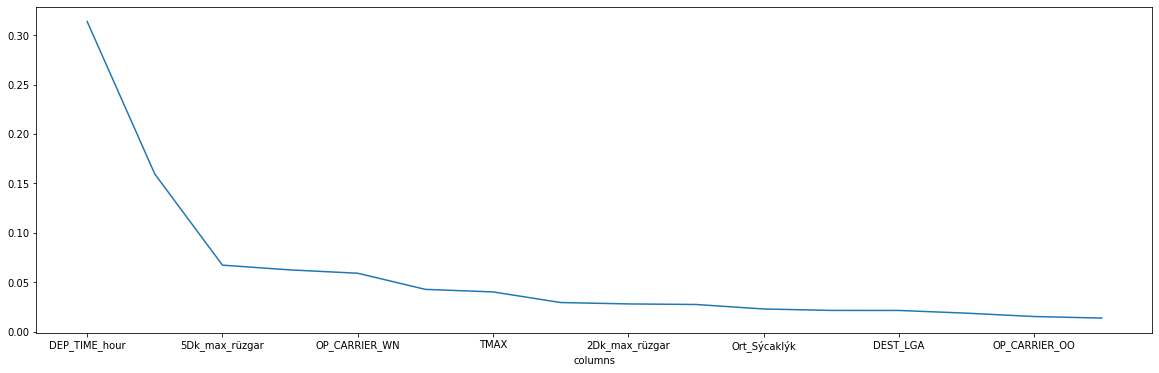

In [44]:
feature_importance_drop_gbc_balanced_with_smote.plot('columns', 'importance', figsize=(20,6), legend=False);

In [45]:
keep_columns_gbc_balanced_with_smote = feature_importance_columns_gbc_balanced_with_smote[feature_importance_columns_gbc_balanced_with_smote["importance"]>0.005]["columns"]; 
len(keep_columns_gbc_balanced_with_smote)

16

In [46]:
keep_columns_gbc_balanced_with_smote

12      DEP_TIME_hour
18      OP_CARRIER_DL
11     5Dk_max_rüzgar
13       DEP_TIME_min
26      OP_CARRIER_WN
2        DAY_OF_MONTH
8                TMAX
5            DISTANCE
10     2Dk_max_rüzgar
9                TMIN
7        Ort_Sýcaklýk
6          Ort_Rüzgar
119          DEST_LGA
82           DEST_EWR
24      OP_CARRIER_OO
3         DAY_OF_WEEK
Name: columns, dtype: object

### Gradient Boosting Feature Importance Model

In [47]:
df_keep_gbc_balanced_with_smote = df[keep_columns_gbc_balanced_with_smote]
x_gbc_feature_importance = df_keep_gbc_balanced_with_smote
y_gbc_feature_importance = df['DEP_DELAY_NEW']
x_gbc_feature_importance_train, x_gbc_feature_importance_test, y_gbc_feature_importance_train, y_gbc_feature_importance_test =     train_test_split(x_gbc_feature_importance, y_gbc_feature_importance, test_size=0.30, shuffle=False)

In [48]:
smote_reshape = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=2)
x_gbc_feature_importance_train_reshape, y_gbc_feature_importance_train_reshape = smote_reshape.fit_resample(x_gbc_feature_importance_train, y_gbc_feature_importance_train)

In [49]:
gbc_balanced_with_smote_feature_importance= GradientBoostingClassifier().fit(x_gbc_feature_importance_train_reshape,                                                                                            y_gbc_feature_importance_train_reshape)
gbc_balanced_with_smote_feature_importance_pred = gbc_balanced_with_smote_feature_importance.predict(x_gbc_feature_importance_test)
gbc_balanced_with_smote_feature_importance.score(x_gbc_feature_importance_test, y_gbc_feature_importance_test)

0.47597160512741943

In [50]:
print(classification_report(y_gbc_feature_importance_test, gbc_balanced_with_smote_feature_importance_pred))

                 precision    recall  f1-score   support

Delay 15-30 min       0.53      0.69      0.60      8775
Delay 30-60 min       0.38      0.24      0.29      6150
      Delay 60+       0.41      0.38      0.39      4656

       accuracy                           0.48     19581
      macro avg       0.44      0.44      0.43     19581
   weighted avg       0.46      0.48      0.46     19581



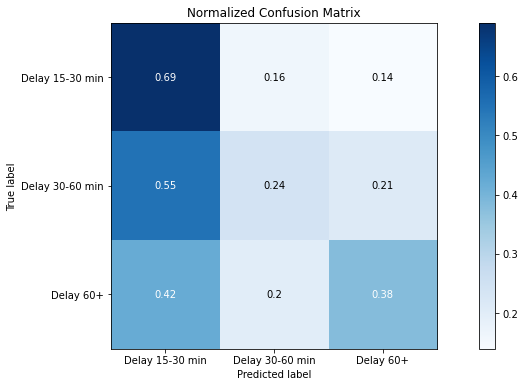

In [51]:
skplt.metrics.plot_confusion_matrix(y_gbc_feature_importance_test, gbc_balanced_with_smote_feature_importance_pred, figsize=(15,6),normalize=True)
plt.show()

# Random Forest

## Random Forest Base Model

In [52]:
x_rf_imbalanced_train, x_rf_imbalanced_test, y_rf_imbalanced_train, y_rf_imbalanced_test = train_test_split(x, y, test_size=0.30,shuffle=False)

In [53]:
rf_imbalanced= RandomForestClassifier().fit(x_rf_imbalanced_train,                                                                                                             y_rf_imbalanced_train)
rf_imbalanced_pred = rf_imbalanced.predict(x_rf_imbalanced_test)
rf_imbalanced.score(x_rf_imbalanced_test, y_rf_imbalanced_test)

0.4785761707777948

In [54]:
print(classification_report(y_rf_imbalanced_test, rf_imbalanced_pred))

                 precision    recall  f1-score   support

Delay 15-30 min       0.52      0.72      0.60      8775
Delay 30-60 min       0.39      0.21      0.27      6150
      Delay 60+       0.42      0.39      0.40      4656

       accuracy                           0.48     19581
      macro avg       0.45      0.44      0.43     19581
   weighted avg       0.46      0.48      0.45     19581



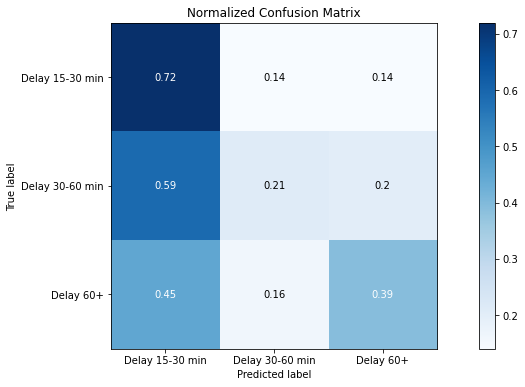

In [55]:
skplt.metrics.plot_confusion_matrix(y_rf_imbalanced_test, rf_imbalanced_pred, figsize=(15,6), normalize=True)
plt.show()

## Random Forest Model with SMOTE

In [56]:
x_rf_balanced_with_smote_train, x_rf_balanced_with_smote_test, y_rf_balanced_with_smote_train, y_rf_balanced_with_smote_test = train_test_split(x, y, test_size=0.30,shuffle=False)

In [57]:
smote_reshape = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=2)
x_rf_balanced_with_smote_train_reshape, y_rf_balanced_with_smote_train_reshape = smote_reshape.fit_resample                                                                                       (x_rf_balanced_with_smote_train, y_rf_balanced_with_smote_train)

In [58]:
rf_balanced_with_smote= RandomForestClassifier().fit(x_rf_balanced_with_smote_train_reshape,                                                                                            y_rf_balanced_with_smote_train_reshape)
rf_balanced_with_smote_pred = rf_balanced_with_smote.predict(x_rf_balanced_with_smote_test)
rf_balanced_with_smote.score(x_rf_balanced_with_smote_test, y_rf_balanced_with_smote_test)

0.43465604412440634

In [59]:
print(classification_report(y_rf_balanced_with_smote_test, rf_balanced_with_smote_pred))

                 precision    recall  f1-score   support

Delay 15-30 min       0.55      0.44      0.49      8775
Delay 30-60 min       0.35      0.45      0.40      6150
      Delay 60+       0.40      0.39      0.40      4656

       accuracy                           0.43     19581
      macro avg       0.43      0.43      0.43     19581
   weighted avg       0.45      0.43      0.44     19581



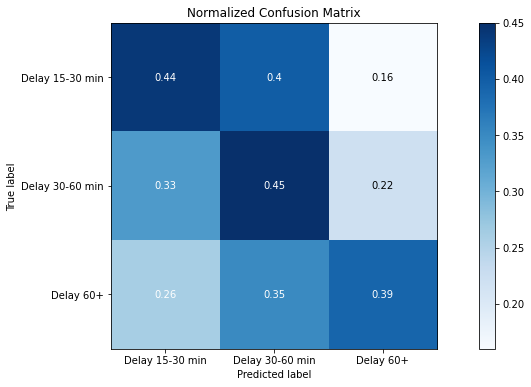

In [60]:
skplt.metrics.plot_confusion_matrix(y_rf_balanced_with_smote_test, rf_balanced_with_smote_pred, figsize=(15,6), normalize=True)
plt.show()

## Random Forest Feature Importance

In [61]:
len(rf_balanced_with_smote.feature_importances_)

197

In [62]:
rf_balanced_with_smote.feature_importances_

array([0.00000000e+00, 1.88610938e-02, 3.36496402e-02, 2.43702345e-02,
       0.00000000e+00, 8.57837348e-02, 3.52948883e-02, 3.04941423e-02,
       3.23669977e-02, 3.03034157e-02, 3.25181360e-02, 3.52940146e-02,
       1.41504351e-01, 1.40507447e-01, 6.15198028e-03, 3.92528309e-03,
       3.15100204e-04, 2.38722365e-03, 1.92397567e-02, 1.51433228e-04,
       2.59093854e-03, 5.23600366e-04, 4.17169338e-03, 1.05368157e-03,
       6.22927664e-03, 2.28985448e-03, 1.02263403e-02, 1.11242963e-03,
       2.77582105e-03, 7.42727706e-04, 6.19272414e-04, 7.22201251e-04,
       2.15501175e-04, 9.78376801e-04, 1.60956766e-03, 9.70786589e-04,
       1.49457248e-04, 4.88646282e-05, 6.50537660e-04, 2.85424607e-03,
       2.05108177e-03, 4.11651323e-04, 1.94603605e-03, 1.83378242e-03,
       9.00227790e-04, 3.50028587e-03, 4.80055328e-03, 8.22923795e-04,
       1.58520759e-03, 4.34635355e-04, 1.13979877e-03, 8.30450635e-05,
       5.20317541e-03, 1.06569102e-04, 2.09982280e-03, 9.70407549e-04,
      

In [63]:
pd.set_option('display.max_rows', None)
feature_importance_columns_rf_balanced_with_smote = feature_importance(rf_balanced_with_smote, x);
feature_importance_columns_rf_balanced_with_smote

,columns,importance
12,DEP_TIME_hour,0.141504
13,DEP_TIME_min,0.140507
5,DISTANCE,0.085784
6,Ort_Rüzgar,0.035295
11,5Dk_max_rüzgar,0.035294
2,DAY_OF_MONTH,0.033650
10,2Dk_max_rüzgar,0.032518
8,TMAX,0.032367
7,Ort_Sýcaklýk,0.030494
9,TMIN,0.030303


In [64]:
feature_importance_drop_rf_balanced_with_smote = feature_importance_columns_rf_balanced_with_smote[feature_importance_columns_rf_balanced_with_smote.importance > 0.005]

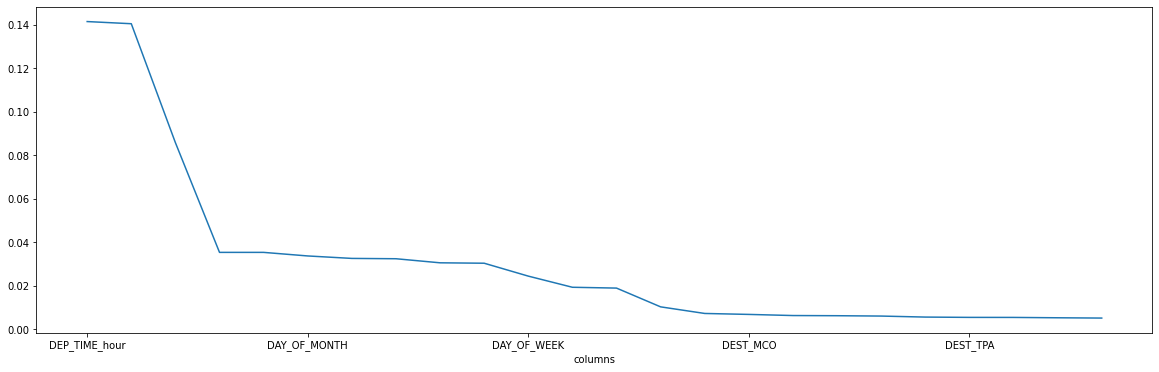

In [65]:
feature_importance_drop_rf_balanced_with_smote.plot('columns', 'importance', figsize=(20,6), legend=False);

In [66]:
keep_columns_rf_balanced_with_smote = feature_importance_columns_rf_balanced_with_smote[feature_importance_columns_rf_balanced_with_smote["importance"]>0.005]["columns"]; 
len(keep_columns_rf_balanced_with_smote)

24

In [67]:
keep_columns_rf_balanced_with_smote

12      DEP_TIME_hour
13       DEP_TIME_min
5            DISTANCE
6          Ort_Rüzgar
11     5Dk_max_rüzgar
2        DAY_OF_MONTH
10     2Dk_max_rüzgar
8                TMAX
7        Ort_Sýcaklýk
9                TMIN
3         DAY_OF_WEEK
18      OP_CARRIER_DL
1               MONTH
26      OP_CARRIER_WN
119          DEST_LGA
123          DEST_MCO
24      OP_CARRIER_OO
14      OP_CARRIER_9E
87           DEST_FLL
82           DEST_EWR
187          DEST_TPA
146          DEST_ORD
52           DEST_BWI
70           DEST_DCA
Name: columns, dtype: object

### Random Forest Feature Importance Model

In [68]:
df_keep_rf_balanced_with_smote = df[keep_columns_rf_balanced_with_smote]
x_rf_feature_importance = df_keep_rf_balanced_with_smote
y_rf_feature_importance = df['DEP_DELAY_NEW']
x_rf_feature_importance_train, x_rf_feature_importance_test, y_rf_feature_importance_train, y_rf_feature_importance_test =     train_test_split(x_rf_feature_importance, y_rf_feature_importance, test_size=0.30, shuffle=False)

In [69]:
smote_reshape = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=2)
x_rf_feature_importance_train_reshape, y_rf_feature_importance_train_reshape = smote_reshape.fit_resample(x_rf_feature_importance_train, y_rf_feature_importance_train)

In [70]:
rf_balanced_with_smote_feature_importance= RandomForestClassifier().fit(x_rf_feature_importance_train_reshape,                                                                                             y_rf_feature_importance_train_reshape)
rf_balanced_with_smote_feature_importance_pred = rf_balanced_with_smote_feature_importance.predict(x_rf_feature_importance_test)
rf_balanced_with_smote_feature_importance.score(x_rf_feature_importance_test, y_rf_feature_importance_test)

0.4208160972371176

In [71]:
print(classification_report(y_rf_feature_importance_test, rf_balanced_with_smote_feature_importance_pred))

                 precision    recall  f1-score   support

Delay 15-30 min       0.55      0.38      0.45      8775
Delay 30-60 min       0.35      0.48      0.41      6150
      Delay 60+       0.38      0.42      0.40      4656

       accuracy                           0.42     19581
      macro avg       0.43      0.43      0.42     19581
   weighted avg       0.45      0.42      0.42     19581



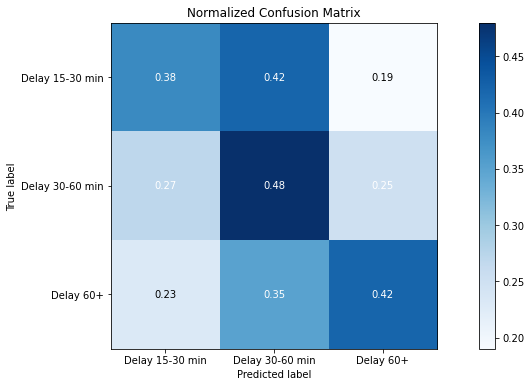

In [72]:
skplt.metrics.plot_confusion_matrix(y_rf_feature_importance_test, rf_balanced_with_smote_feature_importance_pred, figsize=(15,6), normalize=True)
plt.show()

# ExtraTrees

## ExtraTrees Base Model

In [73]:
x_ext_imbalanced_train, x_ext_imbalanced_test, y_ext_imbalanced_train, y_ext_imbalanced_test = train_test_split(x, y, test_size=0.30,shuffle=False)

In [74]:
ext_imbalanced= ExtraTreesClassifier().fit(x_ext_imbalanced_train,                                                                                                            y_ext_imbalanced_train)
ext_imbalanced_pred = ext_imbalanced.predict(x_ext_imbalanced_test)
ext_imbalanced.score(x_ext_imbalanced_test, y_ext_imbalanced_test)

0.4895051325264287

In [75]:
print(classification_report(y_ext_imbalanced_test, ext_imbalanced_pred))

                 precision    recall  f1-score   support

Delay 15-30 min       0.52      0.75      0.62      8775
Delay 30-60 min       0.40      0.21      0.28      6150
      Delay 60+       0.45      0.35      0.40      4656

       accuracy                           0.49     19581
      macro avg       0.46      0.44      0.43     19581
   weighted avg       0.47      0.49      0.46     19581



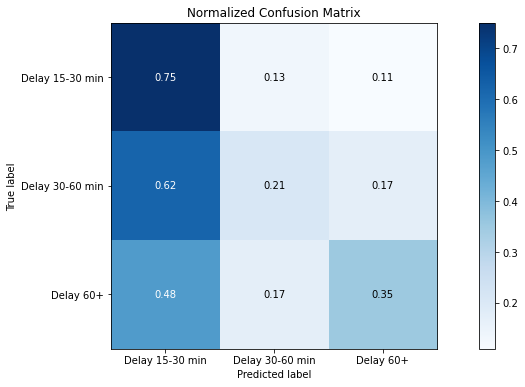

In [76]:
skplt.metrics.plot_confusion_matrix(y_ext_imbalanced_test, ext_imbalanced_pred, figsize=(15,6), normalize=True)
plt.show()

## ExtraTrees Model with SMOTE

In [77]:
x_ext_balanced_with_smote_train, x_ext_balanced_with_smote_test, y_ext_balanced_with_smote_train, y_ext_balanced_with_smote_test = train_test_split(x, y, test_size=0.30,shuffle=False)

In [78]:
smote_reshape = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=2)
x_ext_balanced_with_smote_train_reshape, y_ext_balanced_with_smote_train_reshape = smote_reshape.fit_resample                                                                                       (x_ext_balanced_with_smote_train, y_ext_balanced_with_smote_train)

In [79]:
ext_balanced_with_smote= ExtraTreesClassifier().fit(x_ext_balanced_with_smote_train_reshape,                                                                                           y_ext_balanced_with_smote_train_reshape)
ext_balanced_with_smote_pred = ext_balanced_with_smote.predict(x_ext_balanced_with_smote_test)
ext_balanced_with_smote.score(x_ext_balanced_with_smote_test, y_ext_balanced_with_smote_test)

0.446810683826158

In [80]:
print(classification_report(y_ext_balanced_with_smote_test, ext_balanced_with_smote_pred))

                 precision    recall  f1-score   support

Delay 15-30 min       0.56      0.45      0.50      8775
Delay 30-60 min       0.36      0.47      0.41      6150
      Delay 60+       0.41      0.40      0.41      4656

       accuracy                           0.45     19581
      macro avg       0.45      0.44      0.44     19581
   weighted avg       0.46      0.45      0.45     19581



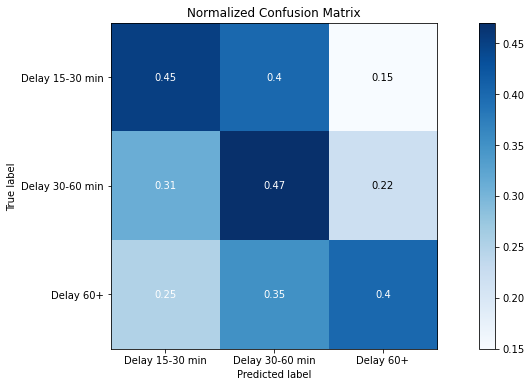

In [81]:
skplt.metrics.plot_confusion_matrix(y_ext_balanced_with_smote_test, ext_balanced_with_smote_pred, figsize=(15,6), normalize=True)
plt.show()

## ExtraTress Feature Importance

In [82]:
len(ext_balanced_with_smote.feature_importances_)

197

In [83]:
ext_balanced_with_smote.feature_importances_

array([0.00000000e+00, 2.58595648e-02, 3.55287625e-02, 3.03137230e-02,
       0.00000000e+00, 4.41298751e-02, 3.41752185e-02, 3.33907400e-02,
       3.40207659e-02, 3.31308814e-02, 3.42611360e-02, 3.62233244e-02,
       1.33594961e-01, 1.30385359e-01, 4.76040716e-03, 3.62154350e-03,
       3.48221298e-04, 2.07573405e-03, 1.67108053e-02, 1.53136898e-04,
       2.21858196e-03, 5.25132438e-04, 3.57456572e-03, 9.97042328e-04,
       5.24186035e-03, 1.91474633e-03, 8.95736761e-03, 9.54190367e-04,
       2.56697551e-03, 8.97194116e-04, 8.18196330e-04, 8.78480285e-04,
       2.23431648e-04, 1.10305123e-03, 1.99201309e-03, 1.22757983e-03,
       1.59277360e-04, 6.45019143e-05, 8.01290321e-04, 3.54863283e-03,
       2.21997805e-03, 5.47776930e-04, 2.41289725e-03, 2.60948699e-03,
       9.67240223e-04, 4.45434294e-03, 5.37248614e-03, 9.00747799e-04,
       1.64205850e-03, 5.89817149e-04, 1.46321052e-03, 1.06709408e-04,
       5.91276579e-03, 1.30861725e-04, 2.68347888e-03, 1.23147912e-03,
      

In [84]:
pd.set_option('display.max_rows', None)
feature_importance_columns_ext_balanced_with_smote = feature_importance(ext_balanced_with_smote, x);
feature_importance_columns_ext_balanced_with_smote

,columns,importance
12,DEP_TIME_hour,0.133595
13,DEP_TIME_min,0.130385
5,DISTANCE,0.044130
11,5Dk_max_rüzgar,0.036223
2,DAY_OF_MONTH,0.035529
10,2Dk_max_rüzgar,0.034261
6,Ort_Rüzgar,0.034175
8,TMAX,0.034021
7,Ort_Sýcaklýk,0.033391
9,TMIN,0.033131


In [85]:
feature_importance_drop_ext_balanced_with_smote = feature_importance_columns_ext_balanced_with_smote[feature_importance_columns_ext_balanced_with_smote.importance > 0.005]

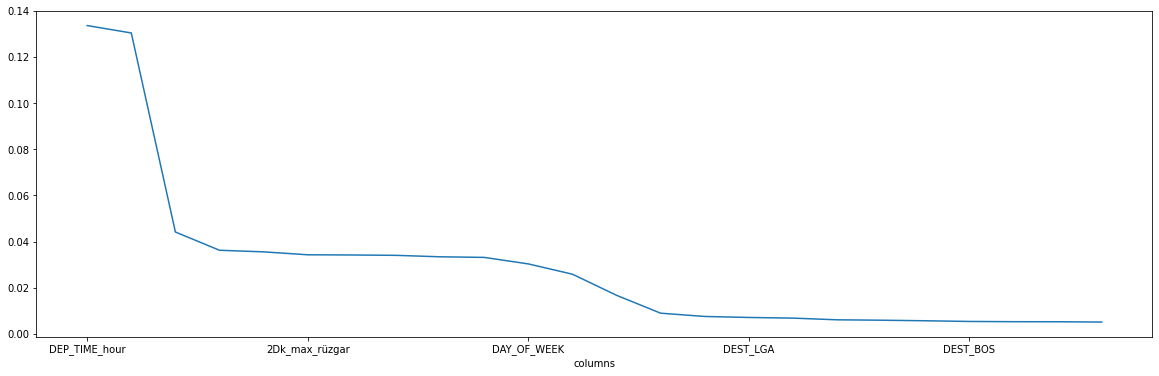

In [86]:
feature_importance_drop_ext_balanced_with_smote.plot('columns', 'importance', figsize=(20,6), legend=False);

In [87]:
keep_columns_ext_balanced_with_smote = feature_importance_columns_ext_balanced_with_smote[feature_importance_columns_ext_balanced_with_smote["importance"]>0.005]["columns"]; 
len(keep_columns_ext_balanced_with_smote)

24

In [88]:
keep_columns_ext_balanced_with_smote

12      DEP_TIME_hour
13       DEP_TIME_min
5            DISTANCE
11     5Dk_max_rüzgar
2        DAY_OF_MONTH
10     2Dk_max_rüzgar
6          Ort_Rüzgar
8                TMAX
7        Ort_Sýcaklýk
9                TMIN
3         DAY_OF_WEEK
1               MONTH
18      OP_CARRIER_DL
26      OP_CARRIER_WN
123          DEST_MCO
119          DEST_LGA
87           DEST_FLL
187          DEST_TPA
52           DEST_BWI
70           DEST_DCA
46           DEST_BOS
129          DEST_MIA
24      OP_CARRIER_OO
151          DEST_PHL
Name: columns, dtype: object

### ExtraTrees Feature Importance Model

In [89]:
df_keep_ext_balanced_with_smote = df[keep_columns_ext_balanced_with_smote]
x_ext_feature_importance = df_keep_ext_balanced_with_smote
y_ext_feature_importance = df['DEP_DELAY_NEW']
x_ext_feature_importance_train, x_ext_feature_importance_test, y_ext_feature_importance_train, y_ext_feature_importance_test =     train_test_split(x_ext_feature_importance, y_ext_feature_importance, test_size=0.30, shuffle=False)

In [90]:
smote_reshape = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=2)
x_ext_feature_importance_train_reshape, y_ext_feature_importance_train_reshape = smote_reshape.fit_resample(x_ext_feature_importance_train, y_ext_feature_importance_train)

In [91]:
ext_balanced_with_smote_feature_importance= ExtraTreesClassifier().fit(x_ext_feature_importance_train_reshape,                                                                                             y_ext_feature_importance_train_reshape)
ext_balanced_with_smote_feature_importance_pred = ext_balanced_with_smote_feature_importance.predict(x_ext_feature_importance_test)
ext_balanced_with_smote_feature_importance.score(x_ext_feature_importance_test, y_ext_feature_importance_test)

0.39691537715132014

In [92]:
print(classification_report(y_ext_feature_importance_test, ext_balanced_with_smote_feature_importance_pred))

                 precision    recall  f1-score   support

Delay 15-30 min       0.56      0.25      0.35      8775
Delay 30-60 min       0.34      0.59      0.43      6150
      Delay 60+       0.39      0.42      0.40      4656

       accuracy                           0.40     19581
      macro avg       0.43      0.42      0.39     19581
   weighted avg       0.45      0.40      0.39     19581



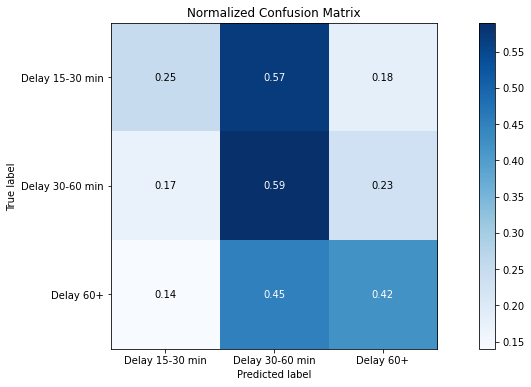

In [93]:
skplt.metrics.plot_confusion_matrix(y_ext_feature_importance_test, ext_balanced_with_smote_feature_importance_pred, figsize=(15,6), normalize=True)
plt.show()

# XGBoost

## XGBoost Base Model

In [94]:
x_xgb_imbalanced_train, x_xgb_imbalanced_test, y_xgb_imbalanced_train, y_xgb_imbalanced_test = train_test_split(x, y, test_size=0.30,shuffle=False)

In [95]:
xgb_imbalanced= XGBClassifier().fit(x_xgb_imbalanced_train, y_xgb_imbalanced_train)
xgb_imbalanced_pred = xgb_imbalanced.predict(x_xgb_imbalanced_test)
xgb_imbalanced.score(x_xgb_imbalanced_test, y_xgb_imbalanced_test)

E:\Anaconda3\envs\Machine_Learning_VsCode\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[22:51:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
E:\Anaconda3\envs\Machine_Learning_VsCode\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumpt

0.4706603339972422

In [96]:
print(classification_report(y_xgb_imbalanced_test, xgb_imbalanced_pred))

                 precision    recall  f1-score   support

Delay 15-30 min       0.57      0.51      0.54      8775
Delay 30-60 min       0.41      0.40      0.40      6150
      Delay 60+       0.40      0.49      0.44      4656

       accuracy                           0.47     19581
      macro avg       0.46      0.47      0.46     19581
   weighted avg       0.48      0.47      0.47     19581



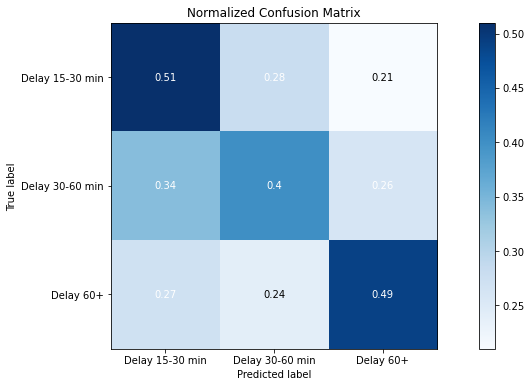

In [97]:
skplt.metrics.plot_confusion_matrix(y_xgb_imbalanced_test, xgb_imbalanced_pred, figsize=(15,6), normalize=True)
plt.show()

## XGBoost Model with SMOTE

In [98]:
x_xgb_balanced_with_smote_train, x_xgb_balanced_with_smote_test, y_xgb_balanced_with_smote_train, y_xgb_balanced_with_smote_test = train_test_split(x, y, test_size=0.30,shuffle=False)

In [99]:
smote_reshape = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=2)
x_xgb_balanced_with_smote_train_reshape, y_xgb_balanced_with_smote_train_reshape = smote_reshape.fit_resample                                                                                       (x_xgb_balanced_with_smote_train, y_xgb_balanced_with_smote_train)

In [100]:
xgb_balanced_with_smote= XGBClassifier().fit(x_xgb_balanced_with_smote_train_reshape,                                                                                           y_xgb_balanced_with_smote_train_reshape)
xgb_balanced_with_smote_pred = xgb_balanced_with_smote.predict(x_xgb_balanced_with_smote_test)
xgb_balanced_with_smote.score(x_xgb_balanced_with_smote_test, y_xgb_balanced_with_smote_test)

E:\Anaconda3\envs\Machine_Learning_VsCode\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[22:52:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
E:\Anaconda3\envs\Machine_Learning_VsCode\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumpt

0.48378530207854553

In [101]:
print(classification_report(y_xgb_balanced_with_smote_test, xgb_balanced_with_smote_pred))

                 precision    recall  f1-score   support

Delay 15-30 min       0.56      0.63      0.59      8775
Delay 30-60 min       0.43      0.28      0.34      6150
      Delay 60+       0.39      0.48      0.44      4656

       accuracy                           0.48     19581
      macro avg       0.46      0.46      0.45     19581
   weighted avg       0.48      0.48      0.47     19581



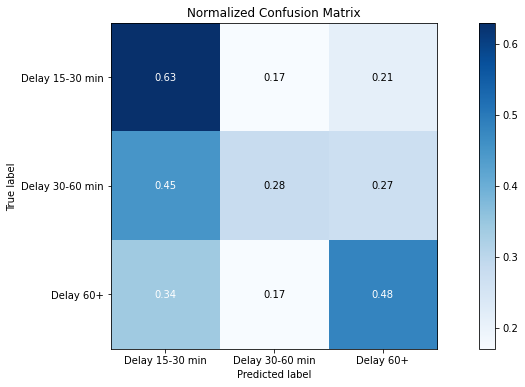

In [102]:
skplt.metrics.plot_confusion_matrix(y_xgb_balanced_with_smote_test, xgb_balanced_with_smote_pred, figsize=(15,6), normalize=True)
plt.show()

## XGBoot Feature Importance

In [103]:
len(xgb_balanced_with_smote.feature_importances_)

197

In [104]:
xgb_balanced_with_smote.feature_importances_

array([0.        , 0.00494615, 0.00558537, 0.00451875, 0.        ,
       0.00930707, 0.00463581, 0.00643767, 0.00633534, 0.00657153,
       0.00715323, 0.00933297, 0.01177865, 0.00613289, 0.00813803,
       0.0081949 , 0.00514783, 0.00973564, 0.03200245, 0.0021482 ,
       0.0074236 , 0.00298293, 0.00901175, 0.00434759, 0.0130509 ,
       0.00517746, 0.02943882, 0.00393084, 0.00866363, 0.00367225,
       0.00241321, 0.00347238, 0.00270676, 0.0040442 , 0.00194013,
       0.        , 0.00212459, 0.        , 0.00537571, 0.00593834,
       0.0055992 , 0.00339803, 0.00618934, 0.00593288, 0.00322192,
       0.00357699, 0.0062276 , 0.00545129, 0.00712383, 0.0022292 ,
       0.00183871, 0.00099641, 0.00579539, 0.        , 0.00460118,
       0.00301228, 0.00340579, 0.00373782, 0.00380367, 0.00199686,
       0.00438535, 0.00468183, 0.00391404, 0.00290663, 0.00786002,
       0.        , 0.00276141, 0.00455028, 0.00630025, 0.00364066,
       0.00948677, 0.00421472, 0.00685612, 0.005158  , 0.00550

In [105]:
pd.set_option('display.max_rows', None)
feature_importance_columns_xgb_balanced_with_smote = feature_importance(xgb_balanced_with_smote, x);
feature_importance_columns_xgb_balanced_with_smote

,columns,importance
18,OP_CARRIER_DL,0.032002
26,OP_CARRIER_WN,0.029439
119,DEST_LGA,0.027396
82,DEST_EWR,0.020397
187,DEST_TPA,0.015357
24,OP_CARRIER_OO,0.013051
173,DEST_SFO,0.011864
12,DEP_TIME_hour,0.011779
146,DEST_ORD,0.010256
17,OP_CARRIER_B6,0.009736


In [106]:
feature_importance_drop_xgb_balanced_with_smote = feature_importance_columns_xgb_balanced_with_smote[feature_importance_columns_xgb_balanced_with_smote.importance > 0.005]

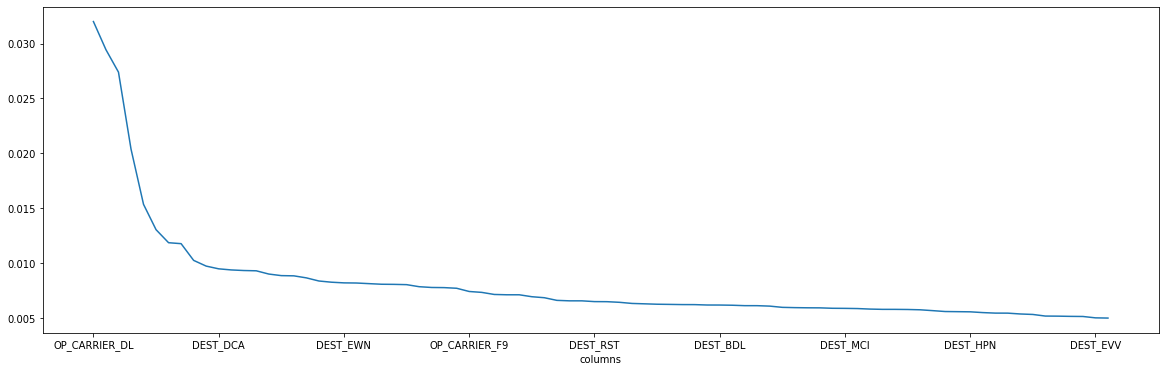

In [107]:
feature_importance_drop_xgb_balanced_with_smote.plot('columns', 'importance', figsize=(20,6), legend=False);

In [108]:
keep_columns_xgb_balanced_with_smote = feature_importance_columns_xgb_balanced_with_smote[feature_importance_columns_xgb_balanced_with_smote["importance"]>0.005]["columns"]; 
len(keep_columns_xgb_balanced_with_smote)

82

In [109]:
keep_columns_xgb_balanced_with_smote

18      OP_CARRIER_DL
26      OP_CARRIER_WN
119          DEST_LGA
82           DEST_EWR
187          DEST_TPA
24      OP_CARRIER_OO
173          DEST_SFO
12      DEP_TIME_hour
146          DEST_ORD
17      OP_CARRIER_B6
70           DEST_DCA
180          DEST_SNA
11     5Dk_max_rüzgar
5            DISTANCE
22      OP_CARRIER_NK
129          DEST_MIA
182          DEST_STL
28      OP_CARRIER_YX
157          DEST_PVD
148          DEST_PBI
81           DEST_EWN
15      OP_CARRIER_AA
14      OP_CARRIER_9E
87           DEST_FLL
116          DEST_LAX
93           DEST_GPT
64           DEST_CRW
151          DEST_PHL
123          DEST_MCO
113          DEST_JAX
20      OP_CARRIER_F9
126          DEST_MEM
10     2Dk_max_rüzgar
48           DEST_BTR
196          DEST_XNA
170          DEST_SBN
72           DEST_DFW
130          DEST_MKE
108          DEST_ILM
9                TMIN
165          DEST_RST
75           DEST_DTW
7        Ort_Sýcaklýk
8                TMAX
68           DEST_DAL
175       

### XGBoost Feature Importance Model

In [110]:
df_keep_xgb_balanced_with_smote = df[keep_columns_xgb_balanced_with_smote]
x_xgb_feature_importance = df_keep_xgb_balanced_with_smote
y_xgb_feature_importance = df['DEP_DELAY_NEW']
x_xgb_feature_importance_train, x_xgb_feature_importance_test, y_xgb_feature_importance_train, y_xgb_feature_importance_test =     train_test_split(x_xgb_feature_importance, y_xgb_feature_importance, test_size=0.30, shuffle=False)

In [111]:
smote_reshape = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=2)
x_xgb_feature_importance_train_reshape, y_xgb_feature_importance_train_reshape = smote_reshape.fit_resample(x_xgb_feature_importance_train, y_xgb_feature_importance_train)

In [112]:
xgb_balanced_with_smote_feature_importance= XGBClassifier().fit(x_xgb_feature_importance_train_reshape,                                                                                             y_xgb_feature_importance_train_reshape)
xgb_balanced_with_smote_feature_importance_pred = xgb_balanced_with_smote_feature_importance.predict(x_xgb_feature_importance_test)
xgb_balanced_with_smote_feature_importance.score(x_xgb_feature_importance_test, y_xgb_feature_importance_test)

E:\Anaconda3\envs\Machine_Learning_VsCode\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[22:52:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
E:\Anaconda3\envs\Machine_Learning_VsCode\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumpt

0.5058475052346663

In [113]:
print(classification_report(y_xgb_feature_importance_test, xgb_balanced_with_smote_feature_importance_pred))

                 precision    recall  f1-score   support

Delay 15-30 min       0.57      0.65      0.61      8775
Delay 30-60 min       0.43      0.37      0.39      6150
      Delay 60+       0.46      0.42      0.44      4656

       accuracy                           0.51     19581
      macro avg       0.48      0.48      0.48     19581
   weighted avg       0.50      0.51      0.50     19581



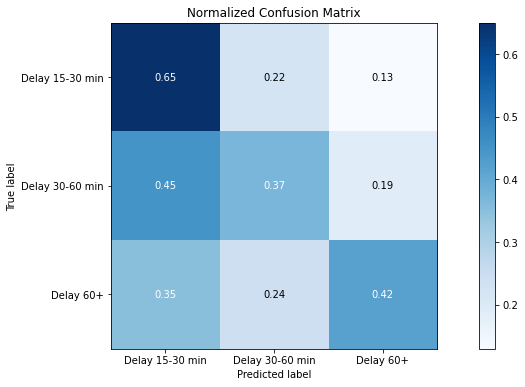

In [114]:
skplt.metrics.plot_confusion_matrix(y_xgb_feature_importance_test, xgb_balanced_with_smote_feature_importance_pred, figsize=(15,6),normalize=True)
plt.show()

# Voting - Gradient Boosting - Random Forest - ExtraTrees

## Voting - Random Forest - ExtraTrees Base Model

In [115]:
x_voting_imbalanced_train, x_voting_imbalanced_test, y_voting_imbalanced_train, y_voting_imbalanced_test = train_test_split(x, y, test_size=0.30,shuffle=False)

In [116]:
estimator = []
estimator.append(('rf', RandomForestClassifier()))
estimator.append(('ext', ExtraTreesClassifier()))

In [117]:
voting_imbalanced = VotingClassifier(estimators = estimator, voting ='soft').fit(x_voting_imbalanced_train,                                                                                                         y_voting_imbalanced_train)
voting_imbalanced_pred = voting_imbalanced.predict(x_voting_imbalanced_test)
voting_imbalanced.score(x_voting_imbalanced_test, y_voting_imbalanced_test)

0.48679842704662685

In [118]:
print(classification_report(y_voting_imbalanced_test, voting_imbalanced_pred))

                 precision    recall  f1-score   support

Delay 15-30 min       0.52      0.76      0.62      8775
Delay 30-60 min       0.40      0.20      0.27      6150
      Delay 60+       0.45      0.36      0.40      4656

       accuracy                           0.49     19581
      macro avg       0.46      0.44      0.43     19581
   weighted avg       0.46      0.49      0.45     19581



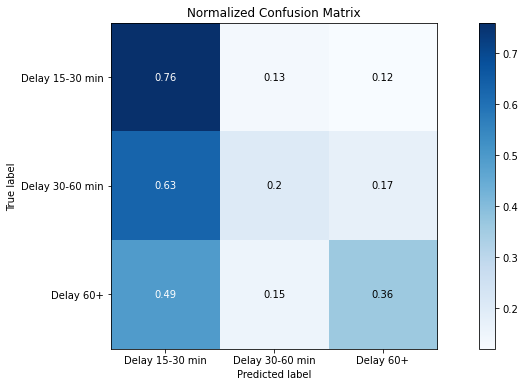

In [119]:
skplt.metrics.plot_confusion_matrix(y_voting_imbalanced_test, voting_imbalanced_pred, figsize=(15,6), normalize=True)
plt.show()

## Voting - Random Forest - ExtraTrees Model with SMOTE

In [120]:
x_voting_balanced_with_smote_train, x_voting_balanced_with_smote_test, y_voting_balanced_with_smote_train, y_voting_balanced_with_smote_test = train_test_split(x, y, test_size=0.30,shuffle=False)

In [121]:
smote_reshape = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=2)
x_voting_balanced_with_smote_train_reshape, y_voting_balanced_with_smote_train_reshape = smote_reshape.fit_resample                                                                                       (x_voting_balanced_with_smote_train,                                                                                                y_voting_balanced_with_smote_train)

In [122]:
estimator = []
estimator.append(('rf', RandomForestClassifier()))
estimator.append(('ext', ExtraTreesClassifier()))

In [123]:
voting_balanced_with_smote = VotingClassifier(estimators = estimator, voting ='soft').fit                                                                       (x_voting_balanced_with_smote_train_reshape, y_voting_balanced_with_smote_train_reshape)
voting_balanced_with_smote_pred = voting_balanced_with_smote.predict(x_voting_imbalanced_test)
voting_balanced_with_smote.score(x_voting_balanced_with_smote_test, y_voting_balanced_with_smote_test)

0.448291711352842

In [124]:
print(classification_report(y_voting_balanced_with_smote_test, voting_balanced_with_smote_pred))

                 precision    recall  f1-score   support

Delay 15-30 min       0.56      0.46      0.51      8775
Delay 30-60 min       0.36      0.47      0.41      6150
      Delay 60+       0.42      0.39      0.40      4656

       accuracy                           0.45     19581
      macro avg       0.45      0.44      0.44     19581
   weighted avg       0.46      0.45      0.45     19581



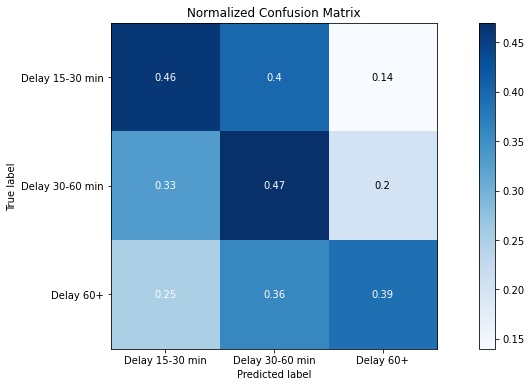

In [125]:
skplt.metrics.plot_confusion_matrix(y_voting_balanced_with_smote_test, voting_balanced_with_smote_pred, figsize=(15,6), normalize=True)
plt.show()